In [1]:
import os
import cv2
import numpy as np

path = 'tiny_mnist/'

imgs = []
lbls = []
numb_label = 3

for i in range(numb_label):
  path2 = path+'/'+str(i)
  for filename in os.listdir(path2):
    img = cv2.imread(path2+'/'+filename, cv2.IMREAD_GRAYSCALE)
    imgs.append(img)
    lbls.append(i)

imgs = np.array(imgs)
lbls = np.array(lbls)

print('imgs', imgs.shape)
print('lbls', lbls.shape)

imgs (90, 28, 28)
lbls (90,)


### Plot dataset by label

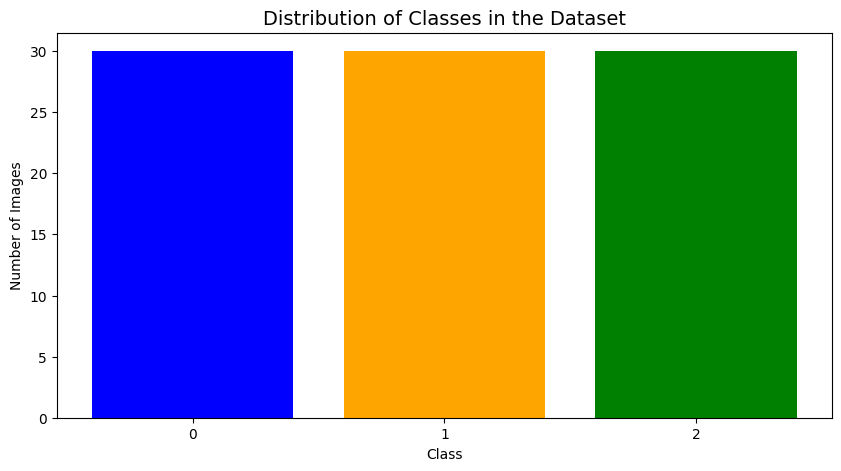

In [3]:
import matplotlib.pyplot as plt
import collections

# Count the number of images in each class
counter = collections.Counter(lbls)

# Extract the counts for each class
classes = [0, 1, 2]
counts = [counter[cls] for cls in classes]

# Plot the counts
def plot_class_distribution(classes, counts):
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, color=['blue', 'orange', 'green'])
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Classes in the Dataset', fontsize=14)
    plt.xticks(classes)
    plt.show()

plot_class_distribution(classes, counts)

In [ ]:
import torch

tx = torch.tensor(imgs, dtype=torch.float32)

img_size = tx.shape[1] * tx.shape[2]

tx = tx.reshape(-1, img_size)
ty = torch.tensor(lbls, dtype=torch.long)

print('tx', tx.shape)
print('ty', ty.shape)

tx torch.Size([90, 784])
ty torch.Size([90])


In [ ]:
import torch.nn as nn
import torch.optim as optim

class MyNeuralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(28*28, 256),
        nn.Sigmoid(),
        nn.Linear(256, 128),
        nn.Sigmoid(),
        nn.Linear(128, 32),
        nn.Sigmoid(),
        nn.Linear(32, 3)
    )
    self.losses = []

  def forward(self, x):
    out = self.layers(x)
    return out

  def fit(self, x, y, epochs=1000, lr=0.01):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(self.parameters(), lr=lr)
    for epoch in range(epochs):
      optimizer.zero_grad()
      y_pred = self.forward(x)
      J = loss_fn(y_pred, y)

      if epoch % 20 == 0:
        print('Epoch: %d, J: %f' % (epoch, J.item()))

      J.backward()
      optimizer.step()
      self.losses.append(J.item())

  def predict(self, x):
    y_pred = self(x)
    y_pred = torch.argmax(y_pred, dim=1)
    return y_pred

  def evaluate(self, x, y):
    y_pred = self.predict(x)
    accuracy = (y_pred == y).sum().item() / len(y)
    return accuracy

tmp = torch.rand(100, 28*28)
model = MyNeuralModel()
y_pred = model.forward(tmp)
print('y_pred', y_pred.shape)

def numb_params(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('numb_params', numb_params(model))

y_pred torch.Size([100, 3])
numb_params 238083


### Train

In [ ]:
model = MyNeuralModel()
model.fit(tx, ty, epochs=1000, lr=0.1)

Epoch: 0, J: 1.114250
Epoch: 20, J: 1.090347
Epoch: 40, J: 1.084054
Epoch: 60, J: 1.076142
Epoch: 80, J: 1.064088
Epoch: 100, J: 1.044005
Epoch: 120, J: 1.008170
Epoch: 140, J: 0.941808
Epoch: 160, J: 0.822831
Epoch: 180, J: 0.671856
Epoch: 200, J: 0.534652
Epoch: 220, J: 0.428929
Epoch: 240, J: 0.344605
Epoch: 260, J: 0.278318
Epoch: 280, J: 0.224828
Epoch: 300, J: 0.183436
Epoch: 320, J: 0.151148
Epoch: 340, J: 0.125933
Epoch: 360, J: 0.105871
Epoch: 380, J: 0.089799
Epoch: 400, J: 0.077444
Epoch: 420, J: 0.067534
Epoch: 440, J: 0.059459
Epoch: 460, J: 0.052733
Epoch: 480, J: 0.047120
Epoch: 500, J: 0.042468
Epoch: 520, J: 0.038527
Epoch: 540, J: 0.035111
Epoch: 560, J: 0.032155
Epoch: 580, J: 0.029649
Epoch: 600, J: 0.027466
Epoch: 620, J: 0.025411
Epoch: 640, J: 0.023700
Epoch: 660, J: 0.022175
Epoch: 680, J: 0.020798
Epoch: 700, J: 0.019486
Epoch: 720, J: 0.018380
Epoch: 740, J: 0.017388
Epoch: 760, J: 0.016482
Epoch: 780, J: 0.015639
Epoch: 800, J: 0.014875
Epoch: 820, J: 0.01417

#### Plot Learning

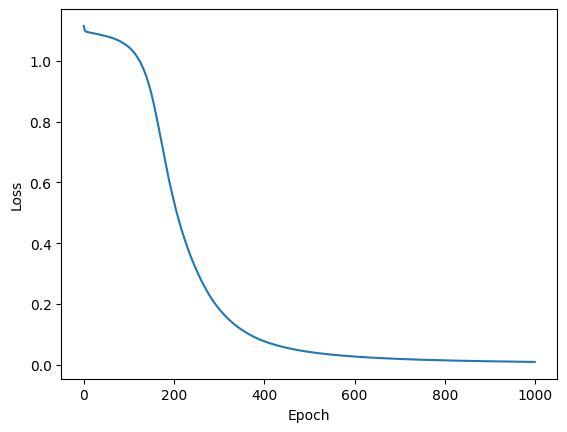

In [ ]:
import matplotlib.pyplot as plot

def plot_learning(model):
  plot.plot(model.losses)
  plot.xlabel('Epoch')
  plot.ylabel('Loss')
  plot.show()

plot_learning(model)

### Evaluate model

In [ ]:
acc = model.evaluate(tx, ty)
print('accuracy', acc)

accuracy 1.0


### Save the model

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/fund_ML/model_4_2.sav')

### Load the Saved Model

In [ ]:
loaded_model = MyNeuralModel()
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/fund_ML/model_4_2.sav'))

<ipython-input-46-09568d0c55e7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/fund_ML/mode

<All keys matched successfully>

### Test Model from Test Dataset

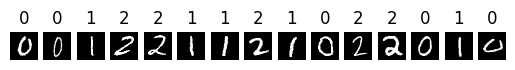

In [ ]:
import matplotlib.pyplot as plot

test_imgs = []
path_test = path+'/test'
for filename in os.listdir(path_test):
  img = cv2.imread(path_test+'/'+filename, cv2.IMREAD_GRAYSCALE)
  test_imgs.append(img)


test_imgs = np.array(test_imgs)
test_x = torch.tensor(test_imgs, dtype=torch.float32)
test_x = test_x.reshape(-1, 28*28)

y_pred = loaded_model.predict(test_x)

# Display images in grid of 3 column with the prediction result
for i in range(len(test_imgs)):
  plot.subplot(1, len(test_imgs), i+1)
  plot.imshow(test_imgs[i], cmap='gray')
  plot.title(y_pred[i].item())
  plot.axis('off')

plot.show()